Data Pipeline project presented at Ironhack in 11/10/2019
The chosen dataset was obtained at the government open data website, it contains the heat focal points in Brasil from 1998 to 2016.
The goal was to answer the questions below.

In [1]:
#number of fire points raised? #is the number of points related with the season of the year? 
#is the number of fire related with the agriculture and cattle farming? 
#gather rain data? (not answered) 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('focos.csv',sep=r"\t", encoding='latin1', engine='python')

Checking imported dataset

In [3]:
df.head()

,"""Ano",Estado,Mês,Número,"Período"""
0,"""1998",Acre,Janeiro,0.0,"01/01/1998"""
1,"""1999",Acre,Janeiro,0.0,"01/01/1999"""
2,"""2000",Acre,Janeiro,0.0,"01/01/2000"""
3,"""2001",Acre,Janeiro,0.0,"01/01/2001"""
4,"""2002",Acre,Janeiro,0.0,"01/01/2002"""


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
"Ano        6454 non-null object
Estado      6454 non-null object
Mês         6454 non-null object
Número      6454 non-null float64
Período"    6454 non-null object
dtypes: float64(1), object(4)
memory usage: 252.2+ KB


Rename columns

In [5]:
df.columns=['year', 'state', 'month', 'number', 'date']

Remove quotes from column 'year' and 'date' (wasn't able to remove during import)

In [6]:
df['year']=df['year'].str.replace('"','')

In [7]:
df['date']=df['date'].str.replace('"','')

In [8]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,01/01/2012
6450,2013,Tocantins,Dezembro,85.0,01/01/2013
6451,2014,Tocantins,Dezembro,223.0,01/01/2014
6452,2015,Tocantins,Dezembro,373.0,01/01/2015
6453,2016,Tocantins,Dezembro,119.0,01/01/2016


Replace values for 'month' column 

In [9]:
df['month']=df['month'].replace({'Janeiro':1, 'Fevereiro':2,'Março':3,'Abril':4,'Maio':5,'Junho':6,'Julho':7,'Agosto':8,'Setembro':9,'Outubro':10,'Novembro':11,'Dezembro':12})

In [10]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,12,128.0,01/01/2012
6450,2013,Tocantins,12,85.0,01/01/2013
6451,2014,Tocantins,12,223.0,01/01/2014
6452,2015,Tocantins,12,373.0,01/01/2015
6453,2016,Tocantins,12,119.0,01/01/2016


Drop 'date' column (incorrect month)

In [11]:
df.drop('date',axis=1, inplace=True)

'december' is missing for year 2017

In [12]:
df[df['year']=='2017'].tail()

,year,state,month,number
6354,2017,Tocantins,7,2.397
6374,2017,Tocantins,8,3.536
6394,2017,Tocantins,9,10.737
6414,2017,Tocantins,10,2.969
6434,2017,Tocantins,11,434.000


Drop rows from 2017 

In [13]:
df.drop(df[df['year']=='2017'].index, inplace=True)

In [14]:
df.info(10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6156 entries, 0 to 6453
Data columns (total 4 columns):
year      6156 non-null object
state     6156 non-null object
month     6156 non-null int64
number    6156 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.5+ KB


Convert 'number' column to integer

In [15]:
df['number']=df['number'].astype('int')

In [16]:
df['number'].describe()

count    6156.000000
mean      107.519168
std       189.488630
min         0.000000
25%         3.000000
50%        23.000000
75%       112.250000
max       998.000000
Name: number, dtype: float64

In [17]:
df.year.unique()

array(['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'], dtype=object)

Group by year, it shows the sum of fires per year

In [18]:
years=df.groupby(['year'],as_index=False).sum()
years

,year,month,number
0,1998,2106,19999
1,1999,2106,26869
2,2000,2106,27341
3,2001,2106,29056
4,2002,2106,37369
5,2003,2106,42737
6,2004,2106,38427
7,2005,2106,34984
8,2006,2106,33819
9,2007,2106,33017


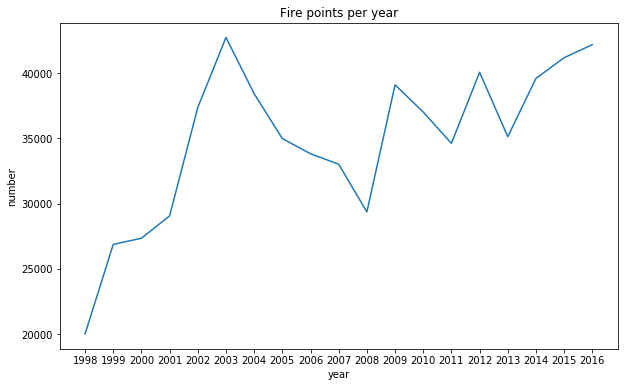

In [19]:
plt.figure(figsize = (10,6))
ax=sns.lineplot(x='year',y='number',data=years,)
plt.title('Fire points per year')
plt.savefig('fire_per_year.png')

States with higher number of fire points

In [45]:
states=df.groupby(['state'], as_index=False)['number'].sum().sort_values(by='number',ascending=False)
states

,state,number
25,São Paulo,48578
11,Mato Grosso do Sul,45935
10,Mato Grosso,44586
4,Bahia,43277
13,Paraná,36887
17,Piauí,36290
8,Goiás,36097
12,Minas Gerais,35872
26,Tocantins,32299
3,Amazonas,29731


In [46]:
states.columns

Index(['state', 'number'], dtype='object')

Bar graph showing states with higher number of fire points

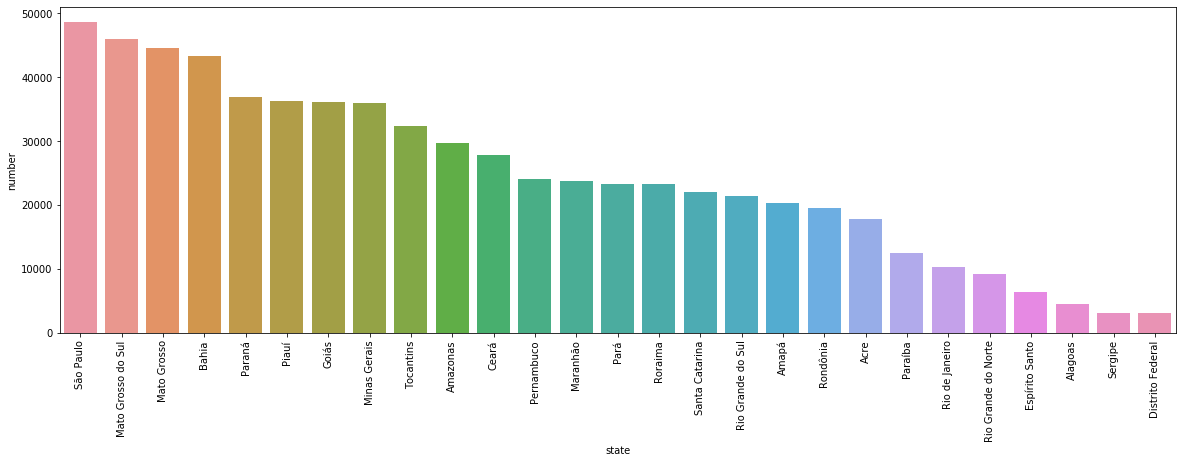

In [48]:
plt.figure(figsize = (20,6))
sns.barplot(x='state',y='number',data=states)
plt.xticks(rotation=90)
plt.savefig('fire_per_state.png')

States of the 'legal Amazon'

In [19]:
legal=['Acre', 'Amapá', 'Amazonas', 'Mato Grosso', 'Pará', 'Rondônia', 'Roraima', 'Tocantins', 'Maranhão']
legal_five=['Amazonas', 'Mato Grosso', 'Pará', 'Tocantins', 'Maranhão']

Fire points for the legal Amazon states

In [350]:
state_year = df[df['state'].isin(legal)].groupby(by = ['year','state']).sum().reset_index()

Fire points for the top 5 legal Amazon states

In [20]:
state_year5 = df[df['state'].isin(legal_five)].groupby(by = ['year','state']).sum().reset_index()

In [351]:
state_year.head()

,year,state,month,number
0,1998,Acre,78,730
1,1998,Amapá,78,278
2,1998,Amazonas,78,946
3,1998,Maranhão,78,364
4,1998,Mato Grosso,78,290


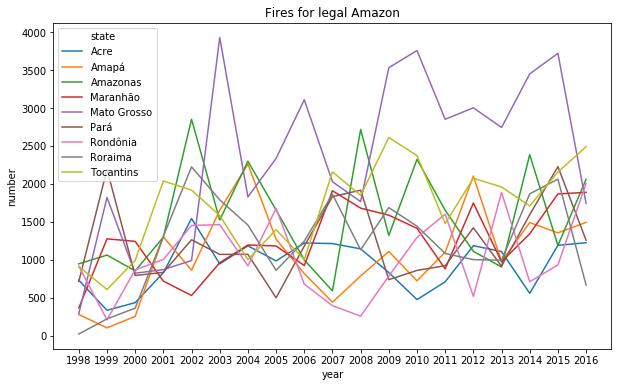

In [469]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'year', y = 'number', data = state_year, hue = 'state')
plt.title('Fires for legal Amazon')
plt.savefig('fire_legal_amz.png')

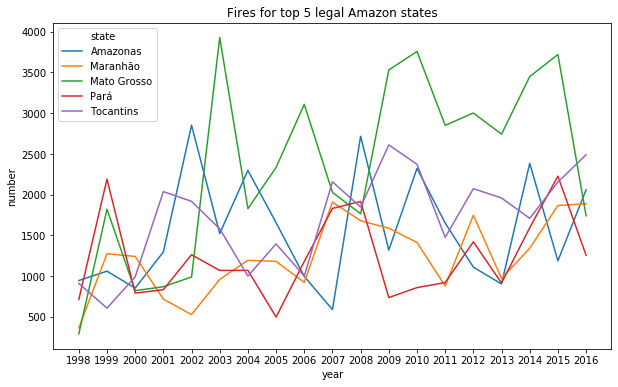

In [23]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'year', y = 'number', data = state_year5, hue = 'state')
plt.title('Fires for top 5 legal Amazon states')
plt.savefig('fire_legal_amz5.png')

Group by month, it shows the total amount of fires per month

In [464]:
months=df.groupby(['month']).sum().reset_index()
months

,month,number
0,1,47747.844
1,2,30848.050
2,3,30717.405
3,4,28188.770
4,5,34731.363
5,6,56010.675
6,7,92326.113
7,8,88050.435
8,9,58578.305
9,10,88681.579


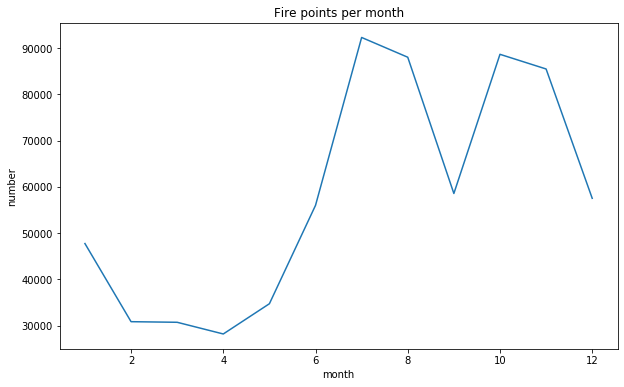

In [465]:
plt.figure(figsize = (10,6))
sns.lineplot(x='month',y='number',data=months)
plt.title('Fire points per month')
plt.savefig('fire_per_month.png')

Fire points per month per year

In [467]:
months = df.pivot_table(values='number',index='month',columns='year')
months

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,,,,,,,,,,
1,0.000000,40.037037,28.814815,20.259259,61.259259,188.555556,100.185185,119.398815,120.555556,113.148148,78.703704,105.481481,105.592593,52.444444,92.259259,75.740741,97.518519,171.666667,107.632444,86.000000
2,0.000000,47.555556,20.777778,39.222222,58.148148,88.814815,46.481481,79.740741,61.703704,64.851852,47.222222,42.222222,88.370370,36.037037,53.185185,58.777778,57.296296,85.518519,114.742593,51.851852
3,0.000000,24.703704,31.407407,5.966963,62.185185,59.967815,75.555556,63.185185,65.703704,79.111111,45.888889,51.555556,89.518519,34.703704,76.222222,72.925926,82.370370,81.555556,60.450593,74.703704
4,0.000000,26.555556,19.888889,40.037037,62.296296,99.148148,49.444444,37.444444,29.333333,15.370370,46.407407,39.925926,81.481481,42.666667,81.222222,50.814815,87.333333,95.296296,81.621111,57.740741
5,0.000000,67.111111,33.488667,33.266407,47.871407,64.703704,41.644926,58.171889,29.925926,47.629630,20.481481,96.037037,80.937519,73.518519,120.000000,80.185185,118.111111,88.296296,92.151148,92.814815
6,50.081519,53.081519,71.161407,65.728333,109.958444,81.381963,125.218222,130.344222,72.888889,96.975519,47.666667,109.703704,96.963889,169.555556,157.061148,99.489370,122.932111,120.761185,139.872778,153.643000
7,161.396741,131.045296,126.012519,182.835370,252.812296,137.152185,143.997815,181.621111,140.108926,178.370185,125.596926,184.726407,198.381519,201.521704,167.111259,117.782741,144.589037,161.644148,263.149926,219.629556
8,146.837630,131.998444,241.655296,188.179000,160.291704,159.313852,110.162852,171.311222,271.782481,127.683444,221.317074,229.384333,87.666963,84.785481,180.053852,216.886222,101.419222,161.597222,116.193148,152.607778
9,111.592370,139.044148,88.145630,98.156333,105.370778,129.810852,142.064593,60.766333,129.865630,134.961963,109.019926,68.763000,78.236259,124.259000,113.743259,110.356815,115.965704,92.394741,114.111852,102.937667


This heatmap shows that the concentration is higher from july to december 

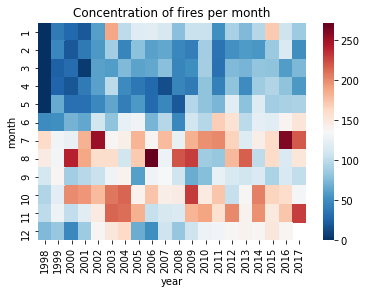

In [468]:
sns.heatmap(months,cmap = "RdBu_r")
plt.title('Concentration of fires per month')
plt.savefig('corr_fire_month.png')

In [409]:
bov=pd.read_csv('bovinos.csv', sep="\t") #head count 

In [410]:
corn=pd.read_csv('milho.csv', sep="\t") #tons

In [411]:
soy=pd.read_csv('soja.csv', sep="\t") #tons

In [412]:
bov.drop('Código', axis=1, inplace=True)

In [413]:
corn.drop('Código', axis=1, inplace=True)

In [414]:
soy.drop('Código', axis=1, inplace=True)

Merge tables 'corn','soy' and 'cattle' production

In [415]:
agro=(corn.merge(soy, on='Nome')).merge(bov, on='Nome')

In [416]:
agro.columns=['state','soy','corn','cattle']

In [417]:
agro.tail()

,state,soy,corn,cattle
22,Roraima,15.746,79.469,674.501
23,Santa Catarina,2.952.313,1.913.892,3.725.827
24,Sergipe,166.304,X,886.459
25,São Paulo,4.551.967,4.219.449,8.328.671
26,Tocantins,648.768,1.887.840,6.340.469


In [32]:
agro.state

NameError: name 'agro' is not defined

Replace 'X' with null value

In [419]:
agro.replace('X',0, inplace=True)

In [448]:
agro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 4 columns):
state     27 non-null object
soy       27 non-null float64
corn      20 non-null float64
cattle    27 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


Create function to remove '.' and convert it to float number

In [447]:
def convert_num(data):
    agro[data]=agro[data].str.replace(r'.','').astype(float)

In [421]:
datas=['soy','corn','cattle']
for i in datas:
    convert_num(i)

In [422]:
agro.head()

,state,soy,corn,cattle
0,Acre,57918.0,NaN,2133001.0
1,Alagoas,43785.0,813.0,785836.0
2,Amapá,1332.0,33482.0,36481.0
3,Amazonas,10124.0,NaN,1253852.0
4,Bahia,2193500.0,4904810.0,8171185.0


Select year=2016 from fires table to compare with farming data

In [449]:
mask=df['year']=='2016'

In [450]:
df_2016=df[mask].groupby(['state']).sum().reset_index()

In [451]:
df_2016.head()

,state,month,number
0,Acre,78,1224.774
1,Alagoas,78,400.000
2,Amapá,78,1493.161
3,Amazonas,78,2060.972
4,Bahia,78,3520.234


Merge fires and farming table

In [220]:
df_agro=df_2016.merge(agro, on='state')
df_agro.drop('month', axis=1, inplace=True)

In [251]:
df_agro.head()

,state,number,soy,corn,cattle
0,Acre,1224,57918,NaN,2133001
1,Alagoas,400,43785,813.0,785836
2,Amapá,1493,1332,33482.0,36481
3,Amazonas,2060,10124,NaN,1253852
4,Bahia,3519,2193500,4904810.0,8171185


Correlation between number of fires and farming

In [225]:
df_agro.corr()

,number,soy,corn,cattle
number,1.000000,0.295930,0.239234,0.497136
soy,0.295930,1.000000,0.926600,0.777025
corn,0.239234,0.926600,1.000000,0.686179
cattle,0.497136,0.777025,0.686179,1.000000


Correlation heatmap

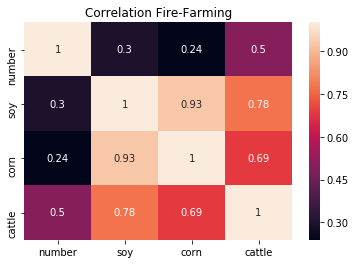

In [470]:
sns.heatmap(df_agro.corr(),annot=True)
plt.title('Correlation Fire-Farming')
plt.savefig('corr_fire_farm.png')

Bar graphs comparing each production with the number of fires

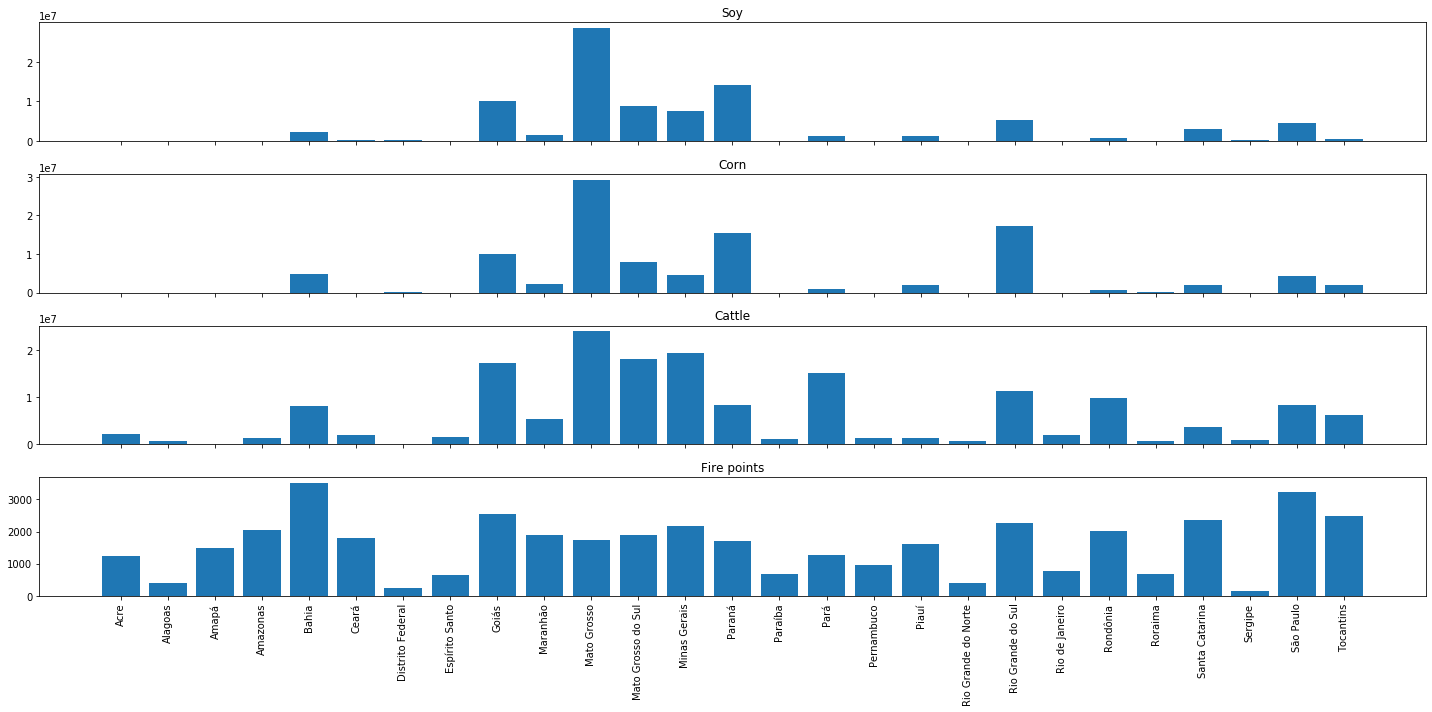

In [472]:
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(20,10))
axes[0].bar('state','soy',data=df_agro)
axes[0].set_title("Soy")
axes[1].bar('state','corn',data=df_agro)
axes[1].set_title("Corn")
axes[2].bar('state','cattle',data=df_agro)
axes[2].set_title("Cattle")
axes[3].bar('state','number',data=df_agro)
axes[3].set_title("Fire points")
plt.xticks(rotation=90)
fig.tight_layout()
plt.savefig('comparative.png')